## PANSS and SAPS/SANS (sub)scores converter : Analysis and Visualization of results

### Import the relevant libraries

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

C:\Users\smine\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### Load and set input data

In [2]:
cur_dir = list(filter(lambda x: 'csv' in x, os.listdir(os.getcwd())))
factor_analysis_neg = pd.read_csv(cur_dir[1],sep=';',index_col='Items').dropna()
factor_analysis_pos = pd.read_csv(cur_dir[2],sep=';',index_col='Items').dropna()
correlation_matrix = pd.read_csv(cur_dir[0],sep=';',index_col='Items').dropna()

### Reorder data

In [3]:
items_order = ['PANSS_DELUSIONS','PANSS_CON_DIS','PANSS_HALLUCINATORY_BEHAVIOR','PANSS_EXCITEMENT','PANSS_GRANDIOSITY',
               'PANSS_SUSPICIOUSNESS', 'PANSS_HOSTILITY','SAPS_HALLUCINATIONS','SAPS_DELUSIONS','SAPS_BEHAVIOR',
               'SAPS_THOUGHT_DISORDER','PANSS_BLUNTED_AFFECT','PANSS_EMOTIONAL_WITHDRAWAL','PANSS_POOR_RAPPORT',
               'PANSS_WITHDRAWAL','PANSS_ABSTRACT_THINKING','PANSS_SPONTANEITY','PANSS_STEREOTYPED_THINKING',
               'SANS_AFFECTIVE_FLATTENING','SANS_ALOGIA','SANS_AVOLITION','SANS_ANHEDONIA','SANS_ATTENTION']

items_type = ['Positive']*11+['Negative']*12

items_df = pd.DataFrame()
items_df['items_name'] = items_order
items_df['items_type'] = items_type

correlation_matrix = correlation_matrix.reindex(index=items_df['items_name'],columns=items_df['items_name'])
factor_analysis_neg = factor_analysis_neg.reindex(index= items_df.loc[items_df['items_type']=='Negative','items_name'])
factor_analysis_pos = factor_analysis_pos.reindex(index= items_df.loc[items_df['items_type']=='Positive','items_name'])

### Vizualisation of table

In [4]:
factor_analysis_neg.head(10)
correlation_matrix.head(5)

,Expressivity,Amotivation,Cognition
items_name,,,
PANSS_BLUNTED_AFFECT,0.88,0.06,-0.06
PANSS_EMOTIONAL_WITHDRAWAL,0.12,0.81,-0.04
PANSS_POOR_RAPPORT,0.64,0.10,0.12
PANSS_WITHDRAWAL,-0.07,0.90,0.08
PANSS_ABSTRACT_THINKING,-0.03,-0.01,0.89
PANSS_SPONTANEITY,0.86,-0.12,0.06
PANSS_STEREOTYPED_THINKING,0.36,0.17,0.29
SANS_AFFECTIVE_FLATTENING,0.85,0.14,-0.15
SANS_ALOGIA,0.74,-0.11,0.20


items_name,PANSS_DELUSIONS,PANSS_CON_DIS,PANSS_HALLUCINATORY_BEHAVIOR,PANSS_EXCITEMENT,PANSS_GRANDIOSITY,PANSS_SUSPICIOUSNESS,PANSS_HOSTILITY,SAPS_HALLUCINATIONS,SAPS_DELUSIONS,SAPS_BEHAVIOR,...,PANSS_POOR_RAPPORT,PANSS_WITHDRAWAL,PANSS_ABSTRACT_THINKING,PANSS_SPONTANEITY,PANSS_STEREOTYPED_THINKING,SANS_AFFECTIVE_FLATTENING,SANS_ALOGIA,SANS_AVOLITION,SANS_ANHEDONIA,SANS_ATTENTION
items_name,,,,,,,,,,,,,,,,,,,,,
PANSS_DELUSIONS,1.00,0.30,0.36,0.24,0.40,0.65,0.23,0.43,0.85,0.32,...,0.07,0.29,0.25,-0.06,0.27,0.03,0.03,0.19,0.39,0.27
PANSS_CON_DIS,0.30,1.00,0.02,0.28,0.18,0.21,0.09,0.06,0.22,0.32,...,0.20,0.25,0.28,0.09,0.48,0.10,0.32,0.24,0.24,0.27
PANSS_HALLUCINATORY_BEHAVIOR,0.36,0.02,1.00,0.03,0.12,0.24,-0.06,0.89,0.38,0.12,...,0.10,0.16,0.17,0.13,0.03,0.08,0.02,0.12,0.18,0.19
PANSS_EXCITEMENT,0.24,0.28,0.03,1.00,0.22,0.15,0.26,0.05,0.15,0.25,...,-0.05,-0.01,-0.04,-0.11,0.19,-0.11,0.08,0.01,-0.02,0.06
PANSS_GRANDIOSITY,0.40,0.18,0.12,0.22,1.00,0.29,0.07,0.12,0.39,0.13,...,-0.04,0.16,0.03,-0.10,0.19,-0.04,-0.07,0.12,0.16,0.15


### Correlation Matrix Heatmap

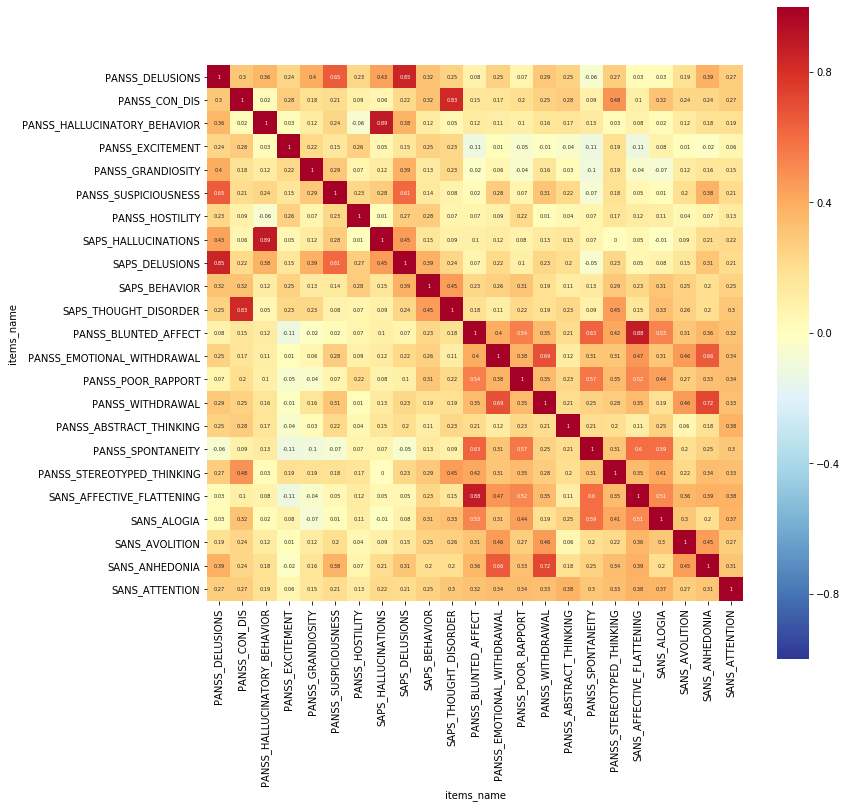

In [5]:
fig1 = plt.figure(1,figsize=(12,12))
color_map = plt.cm.get_cmap('RdYlBu')
sns.heatmap(correlation_matrix, vmin=-1, vmax=1, cmap =color_map.reversed() ,annot=True, annot_kws={"size": 5},square=True)

### Factor Analysis Heatmap

Text(0, 20, 'Positive')

Text(0, 20, 'Negative')

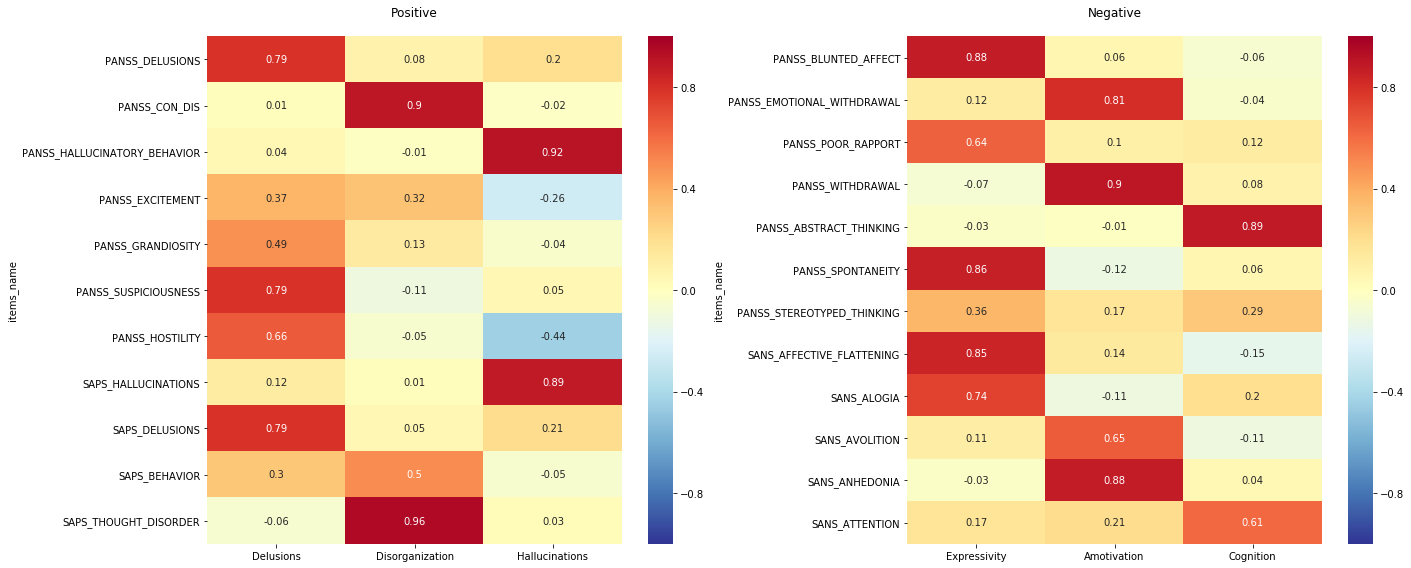

In [6]:
fig2,axn = plt.subplots(1,2,figsize=(20,8))

sns.heatmap(factor_analysis_pos, vmin=-1, vmax=1, cmap =color_map.reversed(), annot=True, ax = axn[0])
sns.heatmap(factor_analysis_neg, vmin=-1, vmax=1, cmap =color_map.reversed(), annot=True, ax = axn[1])

cols = ['Positive','Negative']
pad = 20
for ax, col in zip(axn, cols):
    ax.annotate(col, xy=(0.5, 1), xytext=(0, pad),
                xycoords='axes fraction', textcoords='offset points',
                size='large', ha='center', va='baseline')

fig2.tight_layout()